In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('./data/auto-mpg.csv')
(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [3]:
cols = list(df.columns)
print(cols)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


In [4]:
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].apply(lambda x: float(x))

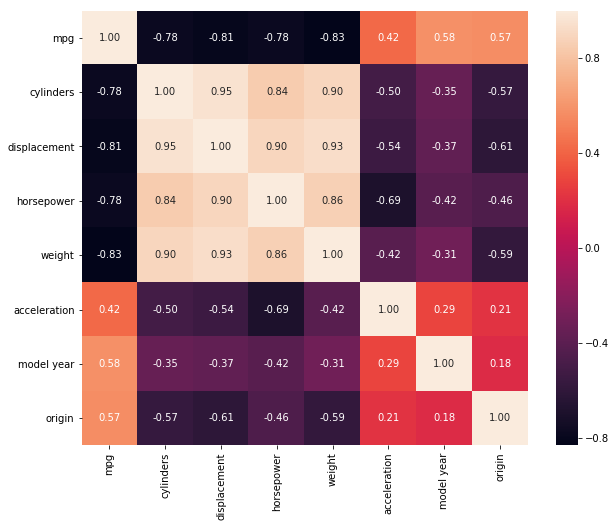

In [5]:
import seaborn as sb

plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(), annot=True, fmt='.2f')

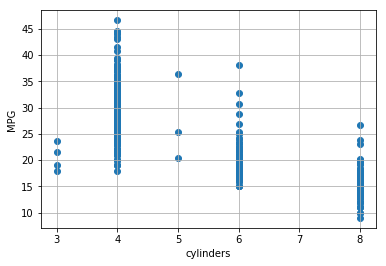

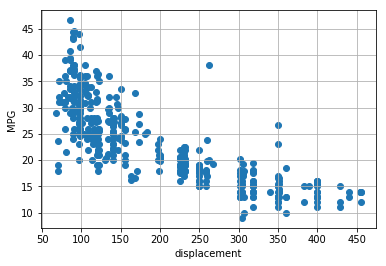

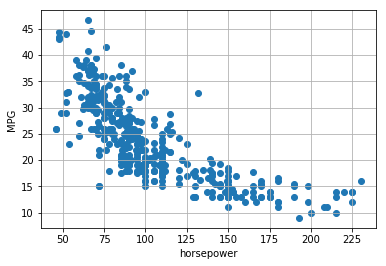

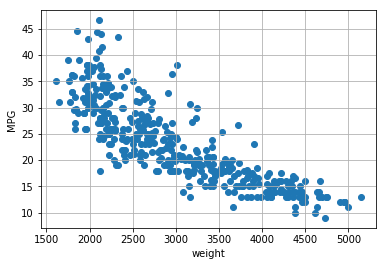

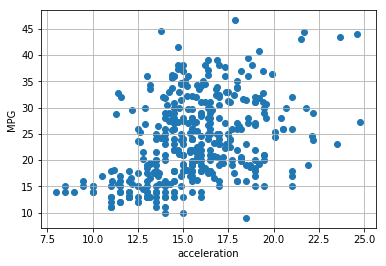

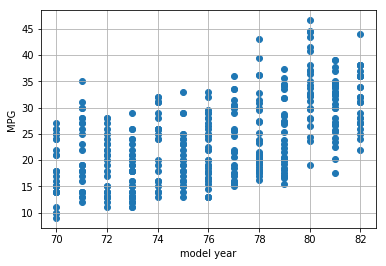

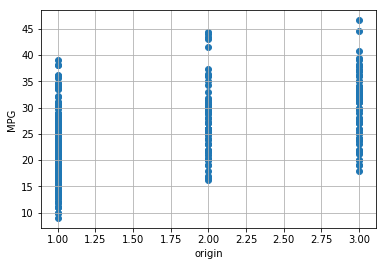

In [6]:
for col in cols[1:]:
    plt.figure()
    plt.scatter(df[col], df['mpg'])
    plt.xlabel(col)
    plt.ylabel("MPG")
    plt.grid()

In [7]:
# applying linear regression on some features
X = df[['displacement', 'model year', 'origin']]
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2340)

lm = LinearRegression()
lm.fit(X_train, y_train)
print("Score is", lm.score(X, y))
print("MSE is", mean_squared_error(y_test, lm.predict(X_test)))

Score is 0.7523169887609212
MSE is 18.91037361977167


In [8]:
# Ohios rating
ip = [[300,  96, 2]]
lm.predict(ip)

array([33.77927709])

In [9]:
# Washington 
ip = [[300,  96, 3]]
lm.predict(ip)

array([34.95140265])

## What is the standard deviation, minimum and Maximum weight of 80s models

In [10]:
df_80s_models = df[df['model year'] >= 80]
print("Minimum weight is", df_80s_models['weight'].min())
print("Maximum weight is", df_80s_models['weight'].max())
print("Std of weight is", df_80s_models['weight'].std())

Minimum weight is 1755
Maximum weight is 3725
Std of weight is 438.56333380608055


## Can you plot how average horsepower of vehical changing every year? Can you comment and justify that? 

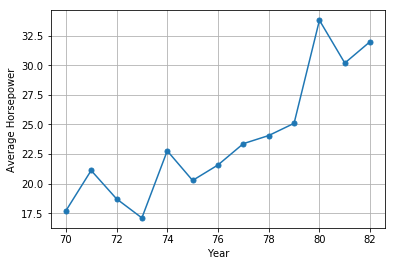

In [15]:
df_year_group = df.groupby('model year')

year = []
hp = []
for name, group in df_year_group:
    year.append(name)
    hp.append(group['horsepower'].mean())

plt.plot(year, hp, marker='o', ms=5)
plt.xlabel("Year")
plt.ylabel("Average Horsepower")
plt.grid()

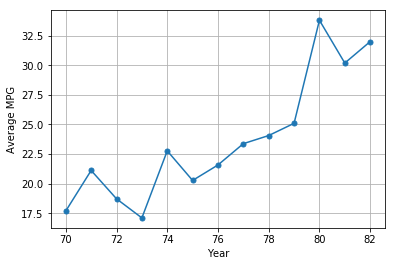

In [18]:
df_year_group = df.groupby('model year')

year = []
mpgs = []
for name, group in df_year_group:
    year.append(name)
    mpgs.append(group['mpg'].mean())

plt.plot(year, mpgs, marker='o', ms=5)
plt.xlabel("Year")
plt.ylabel("Average MPG")
plt.grid()

## If customer is looking for better milege, how mnay cylinder car you will recommend without considering any other parmeters? 

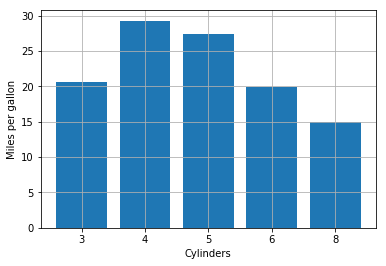

In [14]:
df_year_group = df.groupby('cylinders')

cylinders = []
mpgs = []
for name, group in df_year_group:
    cylinders.append(name)
    mpgs.append(group['mpg'].mean())

plt.bar(np.arange(len(cylinders)), mpgs)
plt.xticks(np.arange(len(cylinders)), cylinders)
plt.xlabel("Cylinders")
plt.ylabel("Miles per gallon")
plt.grid()

## answer is 4 as it has got highest

## Can you find out the average MPG rating for every origin state?

[1, 2, 3]


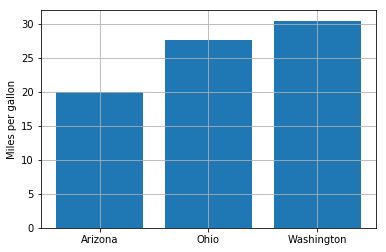

In [13]:
df_year_group = df.groupby('origin')

origin = []
mpgs = []
for name, group in df_year_group:
    origin.append(name)
    mpgs.append(group['mpg'].mean())

print(origin)
plt.bar(np.arange(len(origin)), mpgs)
plt.xticks(np.arange(len(origin)), ("Arizona", "Ohio", "Washington"))
plt.ylabel("Miles per gallon")
plt.grid()
